# Enron Email Spam Detection

**Daniel Cersosimo**

Upon intial exploration of the enron email datatset alongside supplemental research, I have determined to propose the Data Science probelm of determining which emails are spam. This is highly impactful as millions of people everyday across the world see spam hit their inbox. As a result, the ability to be able to identify this and subsequently filter out is useful everyone using email. My intial plan for this solution is to extract the content of the emails and from this content, determine the amount of digits and special characters within each to employ as features in clustering. I may opt for additional features depending on the nature of the data as further exploration ensues however based on my intial brief exploration, the presence of digits and special characters were a notable component of the spam content i viewed in the dataset and have seen from outside experiences. After clustering, I will assess said clusters disingushing ability via by building classificatin models with the clusters as class to look for if said models can classify the data based on the labels from the clusters effectivley.

# Data Collection/Processing:

In [ ]:


import pandas as pd
import sklearn as sk
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import nltk
nltk.download('words')
from nltk.corpus import words
valid_words = words.words()




[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.


In [ ]:
#Here I load in the dataset however I had to constuct logic to handle the incomptable rows and if said rows clear 5 in total, skip the rest as well.
#This is a suitable option due to the sheer magnitude of the dataset however reproducability may be an issue since the rows which have issues change with each loading of the df
path = '/content/emails.csv'
rows = []
user = None
count = 0
while True:
  if user == 'None':
    user = None
  if user != None:
    user = num_1
    rows.append(user)
  num_1 = ""
  try:
    if user == None:
      df = pd.read_csv(path)
    df = pd.read_csv(path, skiprows=rows)
  except  pd.errors.ParserError as e:
    print(e)
    error = str(e)
    num = []
    for char in error[::-1]:
      if char == " ":
        break
      num.append(char)
    num_1 = "".join(num)
    num_1 = int(num_1[::-1])
    count += 1
    if count == 5:
      df = pd.read_csv(path, skiprows = lambda x: x > num_1)
      break
  else:
    break

Error tokenizing data. C error: EOF inside string starting at row 74140
Error tokenizing data. C error: EOF inside string starting at row 74282
Error tokenizing data. C error: EOF inside string starting at row 74385
Error tokenizing data. C error: EOF inside string starting at row 74481
Error tokenizing data. C error: EOF inside string starting at row 74580


In [ ]:
df

,file,message
0,allen-p/_sent_mail/1.,Message-ID: <18782981.1075855378110.JavaMail.e...
1,allen-p/_sent_mail/10.,Message-ID: <15464986.1075855378456.JavaMail.e...
2,allen-p/_sent_mail/100.,Message-ID: <24216240.1075855687451.JavaMail.e...
3,allen-p/_sent_mail/1000.,Message-ID: <13505866.1075863688222.JavaMail.e...
4,allen-p/_sent_mail/1001.,Message-ID: <30922949.1075863688243.JavaMail.e...
...,...,...
74575,dasovich-j/notes_inbox/3317.,Message-ID: <14151385.1075843649871.JavaMail.e...
74576,dasovich-j/notes_inbox/3318.,Message-ID: <8528495.1075843649895.JavaMail.ev...
74577,dasovich-j/notes_inbox/3319.,Message-ID: <27451165.1075843649918.JavaMail.e...
74578,dasovich-j/notes_inbox/332.,Message-ID: <12732449.1075843103541.JavaMail.e...


In [ ]:
df.isnull().sum()

file       0
message    0
dtype: int64

In [ ]:
df = df.drop_duplicates()

In [ ]:
sample_df = df.sample(frac=.06)

In [ ]:
sample_df

,file,message,sender
45128,campbell-l/notes_inbox/256.,Message-ID: <30588387.1075857879676.JavaMail.e...,campbell-l
31534,beck-s/sent/425.,Message-ID: <10304373.1075855906634.JavaMail.e...,beck-s
38076,buy-r/deleted_items/75.,Message-ID: <8768413.1075863356853.JavaMail.ev...,buy-r
35937,blair-l/sent_items/466.,Message-ID: <17225674.1075853074255.JavaMail.e...,blair-l
2662,allen-p/sent/279.,Message-ID: <23522926.1075855685870.JavaMail.e...,allen-p
...,...,...,...
7032,arnold-j/sent_items/772.,Message-ID: <2687048.1075861674836.JavaMail.ev...,arnold-j
25284,beck-s/deleted_items/157.,Message-ID: <29429104.1075845069419.JavaMail.e...,beck-s
56614,dasovich-j/all_documents/11113.,Message-ID: <24883701.1075843428204.JavaMail.e...,dasovich-j
36098,blair-l/sent_items/612.,Message-ID: <18631144.1075853077934.JavaMail.e...,blair-l


In [ ]:




#This block houses the parsing of the contetn of the emails. This process is based on features within the emails where
#it could be viewed that a strong portion of emails began their content after common terms. The limitation of this is also
#noted which is why if an email does not correspond to sucessfull parsing, measures are implemented to skip said email
#again this is viable due to the massive dataset making such skips easily replaceable by sucessfully pasred data. In
#a general sense, the parsing mechanism focuses on single sender and reciepient emails as extracting the content
#can be pinpointed to specific term occurences more accurately.
email_content_3 = {}
valid_indicies = []
for i, num in zip(sample_df['message'], range(len(sample_df['message']))):
  finished = False
  cancel = False
  content = []
  stripped = i.strip()
  Vals = stripped.split()
  if "From:" not in Vals:
    continue
  if "To:" not in Vals:
    continue
  if 'FW:' in Vals:
    continue
  for val in Vals[::-1]:
    if val == 'Re:':
      finished = True
    if val == 'X-FileName:':
      finished = True
    if finished == True:
      break
    content.append(val)
  if "Forwarded" in content:
    cancel = True
  if "Subject:" in content:
    cancel = True
  content.pop()
  if content[len(content)-1] == '(Non-Privileged).pst':
    content.pop()
  for term in content:
    if term not in valid_words:
      content.pop()
      continue
    break
  if cancel == True:
    continue
  ordered_content = content[::-1]
  email_content_3[f'Email {num+1}'] = ordered_content
  valid_indicies.append(num)







In [ ]:
#This leverages the file feature to extract the person of each email
sender = []
for i in df['file']:
  chars = []
  for char in i:
    if char == '/':
      break
    chars.append(char)
  s = "".join(chars)
  sender.append(s)
df['sender'] = sender

In [ ]:
#This uses the indices from the sucessfully parsed emails as  measn of determining which sender indexes are also
valid_senders = df['sender'].iloc[valid_indicies]

df_content = []
for index, value in email_content_3.items():
  text = " ".join(value)
  df_content.append(text)

#This is consolidated into a df which is the sample I will be wokring on. The network will leverage another sample
df_working = pd.DataFrame({'content': df_content, 'sender': valid_senders})

In [ ]:
df_working

,content,sender
0,and wanted to check back with you. Have you ma...,allen-p
2,Image's exciting new Holiday 2001 Catalog will...,allen-p
4,"Jim, Updated curves will be sent no later than...",allen-p
5,"has been scheduled, by Jim, for the above subj...",allen-p
6,"new work email hey jason, how is the new job??...",allen-p
...,...,...
4466,"Monika, Any chance you could calculate the com...",arnold-j
4467,"the Human Capital Needs of the organization,= ...",arnold-j
4468,"Everyone, Here are the team assignments for MP...",arnold-j
4470,...since I waited half an hour for you last time,arnold-j


In [ ]:
#This uses string to import punctuation which I iterate through and remove . and , to develop a special characters list alognside digits
from string import punctuation, digits
sc = []
for i in punctuation:
  if i == '.':
    continue
  if i == ',':
    continue
  sc.append(i)


In [ ]:
digits

'0123456789'

In [ ]:
#This iterates through the content of the valid emails in the sample with some measures to further ensure this valid state
#before going throughe ach character of every email and counting the occurence of digits and special characters
content_1 = []
val_indices = []
dig_list = []
sc_list = []
for email, index in zip(df_working['content'], range(len(df_working['content']))):
  skip = False
  spam = False
  count = 0
  email_list = email.split()
  for term in email_list:
    if term == 'Subject:':
      skip = True
      break
  if skip == True:
    continue
  dig = 0
  count = 0
  for char, i  in zip(email, range(len(email))):
    if char in sc:
      count += 1
    if char in digits:
      dig += 1
  sc_list.append(count)
  dig_list.append(dig)
  val_indices.append(index)
  content_1.append(email)

In [ ]:
#dataframe for the counts, content of said emails, and the indexes
df_spam_f = pd.DataFrame({"digit":dig_list, "specials":sc_list, "working index":val_indices, "content":content_1})

In [ ]:
#df for just the features
df_using = df_spam_f.iloc[:, :-2]
df_using

,digit,specials
0,33,18
1,114,125
2,4,1
3,30,16
4,14,15
...,...,...
2481,0,2
2482,74,78
2483,19,12
2484,0,0


# Data Exploration

**plot email communication graph/network**
* each node is an email account
* the weight of an edge between two accounts depends on how many emails have been sent between them.

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary



#This block contians the logic for extracting the sender and recipent information for each email. This parsing
#method is similar to the one employed above, using points which successfully align with the features used to extract
#sender and recipeint. Data which does not exhibit this syntax is skipped. Albeit similar to above, the citeria is slightly differnt
email_sender_dict_2 = {}
email_recipient_dict_2 = {}
for i, num in zip(df['message'], range(len(df['message']))):
  finished = False
  sender = []
  recipient = []
  stripped = i.strip()
  Vals = stripped.split()
  if "From:" not in Vals:
    continue
  if "To:" not in Vals:
    continue
  count = 0
  try:
    for val in Vals:
      if val == 'From:':
        sender.append(Vals[count+1])
      if val == 'To:':
        recipient.append(Vals[count+1])
      count += 1
  except IndexError:
    continue
  email_sender_dict_2[f'Email {num+1}'] = sender
  email_recipient_dict_2[f'Email {num+1}'] = recipient







In [ ]:
for i in df['file']:
  print(i)
  break

allen-p/_sent_mail/1.


In [ ]:

#This block conducts the operation of extracting the sender and reicpient of each email
df_indices = []
df_send = []
for index, value in email_sender_dict_2.items():
  df_indices.append(index)
  df_send.append(value)

df_receive = []
for index, value in email_recipient_dict_2.items():
  df_receive.append(value)



#This gathers them into a df
cols = ['sender', 'recipient']
df_cleaned = pd.DataFrame({'sender': df_send, 'recipient': df_receive})

In [ ]:
df['sender'].value_counts()

sender
dasovich-j     19214
beck-s         11830
bass-e          7823
campbell-l      6490
arnold-j        4898
blair-l         3415
allen-p         3034
cash-m          2969
baughman-d      2760
buy-r           2429
corman-s        2025
carson-m        1400
cuilla-m        1029
brawner-s       1026
causholli-m      943
badeer-r         877
benson-r         767
arora-h          654
crandell-s       519
bailey-s         478
Name: count, dtype: int64

In [ ]:
df_cleaned

,sender,recipient
0,[phillip.allen@enron.com],[tim.belden@enron.com]
1,[phillip.allen@enron.com],[john.lavorato@enron.com]
2,[phillip.allen@enron.com],[leah.arsdall@enron.com]
3,[phillip.allen@enron.com],[randall.gay@enron.com]
4,[phillip.allen@enron.com],[greg.piper@enron.com]
...,...,...
497562,[john.zufferli@enron.com],[kori.loibl@enron.com]
497563,[john.zufferli@enron.com],[john.lavorato@enron.com]
497564,"[john.zufferli@enron.com, Doucet,]","[dawn.doucet@enron.com, Zufferli,]"
497565,[john.zufferli@enron.com],[jeanie.slone@enron.com]


In [ ]:
#This gathers the senders adn recipents all into a cosnolidated list from the above df. This df is purely for the senders and recipients
senders = []
recipients = []
for s, r in zip(df_cleaned['sender'], df_cleaned['recipient']):
  senders.append(s[0])
  recipients.append(r[0])


In [ ]:
#Due to computaion limitations as well as the need to visualize this network, I opt to sample a small portion of emails
#so that the portrayed netowrk is visually aesthetic
df_cleaned_1 = pd.DataFrame({'sender': senders, 'recipient': recipients})
sample_dfc1 = df_cleaned_1.sample(frac=.0001)

In [ ]:
#view the most prominent senders
df_cleaned_1['sender'].value_counts()

sender
kay.mann@enron.com           16725
vince.kaminski@enron.com     14364
jeff.dasovich@enron.com      11399
pete.davis@enron.com          9149
sara.shackleton@enron.com     8773
                             ...  
mw696@columbia.edu               1
cphillabaum@yahoo.com            1
aviblack@yahoo.com               1
vskirk@hotmail.com               1
ingjald@shaw.ca                  1
Name: count, Length: 19828, dtype: int64

In [ ]:
#view the most freqent recipients
df_cleaned_1['recipient'].value_counts()

recipient
pete.davis@enron.com           9155
tana.jones@enron.com           5677
sara.shackleton@enron.com      4974
vkaminski@aol.com              4870
jeff.dasovich@enron.com        4350
                               ... 
jpiper5360@aol.com                1
mld@nwnatural.com                 1
m1d@nwnatural.com                 1
'12007'@enron.com,                1
ken.gardner@powerpool.ab.ca       1
Name: count, Length: 24634, dtype: int64

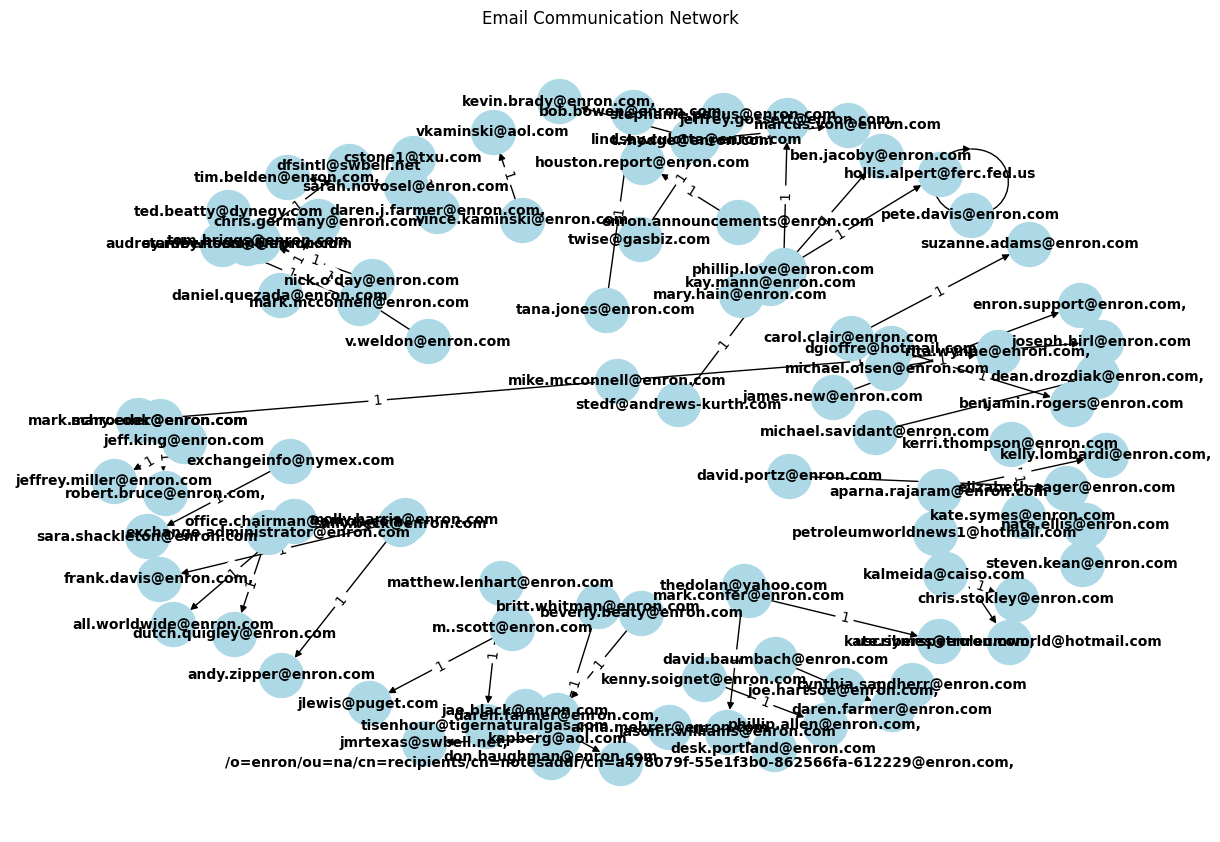

In [ ]:
#For the netwrok cosntruction I will leverage netowrkx library and matplotlib to visualize the network. This library
#streamlines the process of cosnrtucting ndoes, edges and weights on said edges between the distinct nodes of a network
#while being compatible with matplotlib for visualizations.
import networkx as nx
import matplotlib.pyplot as plt

#This computes the frequency of communication between senders and reicpients, intializes the directed graph as emails
#exhibit a direction from sender to recipient, and tbe creation of a node for each email acct
communication_freq = sample_dfc1.groupby(['sender', 'recipient']).size().reset_index(name='frequency')
G = nx.DiGraph()
all_accounts = set(sample_dfc1['sender']).union(set(sample_dfc1['recipient']))
for account in all_accounts:
    G.add_node(account)

#This adds weighted edges between nodes based on communication frequency between two accts
for sender, recipient, freq in zip(communication_freq['sender'], communication_freq['recipient'], communication_freq['frequency']):
    G.add_edge(sender, recipient, weight=freq)

#This visualizes the network
plt.figure(figsize=(12, 8))
pos = nx.spring_layout(G, k=0.3)  # Adjust the spring layout parameter for better visualization
nx.draw(G, pos, with_labels=True, node_size=1000, node_color='lightblue', font_size=10, font_weight='bold')
labels = nx.get_edge_attributes(G, 'weight')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title('Email Communication Network')
plt.show()

# Focused processing, exploration and modeling for Spam Detection

For my solution, I look to further explore the nature of the derived digit and special character count df above in an effort to compute measure of said values which can be used to form functional clusters in detecting spam. Based on the statisical properties of the counts for these categories themselves, I will compute a means of measureing them which will render the clustering an effective measn of providing distinction to spam. Following this, I will employ clustering algorithms to formulate each email into a cluster based on their measures of each of the mertics to be computed. These algorithms will be determined once the mertics are computed and distriubutions are determined. Following this, I will assess the clusters viability in servign as dsitinct categories by ustilizing said clusters as labels and building classification models whose performances will be indicative of distinct clusters. As a point of note before starting, the performance of these classification models is not enitrley indicative of how well the model captures spam as labels are attributed as a product of the clusters themselves which may not be enitrley accurate and thus, the classificaitons look to focus on protraying how well the clusters can serve as distinct labels.

In [ ]:
#This displays medians, further statistics will be below
for f in df_using:
  print(np.median(df_using[f]))



9.0
   digit  specials
0      0         0
8.0
   digit  specials
0      0         0


In [ ]:
df_using.mode()

,digit,specials
0,0,0


In [ ]:
df_using.describe()

,digit,specials
count,2486.000000,2486.000000
mean,80.035800,129.853982
std,433.481307,652.201000
min,0.000000,0.000000
25%,0.000000,2.000000
50%,9.000000,8.000000
75%,33.000000,31.000000
max,9267.000000,14645.000000


In [ ]:
for i in df_using:
  print(df_using[i].value_counts())

digit
0       738
10       88
6        76
2        75
5        72
       ... 
111       1
178       1
417       1
4404      1
775       1
Name: count, Length: 283, dtype: int64
specials
0       253
1       229
2       207
3       155
4       121
       ... 
279       1
2148      1
642       1
181       1
843       1
Name: count, Length: 346, dtype: int64


In [ ]:
print(df_using.quantile(0.8))
print(df_using.quantile(0.85))
print(df_using.quantile(0.9))

digit       42.0
specials    45.0
Name: 0.8, dtype: float64
digit       57.0
specials    87.0
Name: 0.85, dtype: float64
digit        90.0
specials    158.5
Name: 0.9, dtype: float64


Given the nature of these statistics, we cna note how the data suffers from trememdous outliers which skew the standard devaition adn the mean. This is clearly noted by the median of 8 and 9 alognside even 75% of the data falling below measures of 33 and 31 in value. This effetcivley depicts how a smaller portion of the data, the outliers pull this distribtuon adn would in turn render any clusteing scales for distances metrics as flawed. Normalization as well via standard practices ,ay eb limited due to the imapct of these outliers on a potntial min max or z score normalization. This is further corroborated by the .85 and .8, and .9 percentiles which detail a point where we begin to see the outliers come into affect. As I result, I have decided to implement a measure to mitigate the impact of more values following the clearng of a threshold determine via the 80% percentile, before the otuliers come into play. This is effecilvey allow for the outliers to be clustered together as defininte spam as they are clearly. I employ log with a base of 1.2 to exhibit a dimishing returns component which, while mitigating larger values materialize impact, does not in a less restrictive way which a higher base would, allowing for those with extreme values to still be distinct albeit contained.


In [ ]:
d_thres = df_using['digit'].quantile(.8)
s_thres = df_using['specials'].quantile(.8)

In [ ]:
from math import log
#This block houses the operations of extracting the digit and sc count as per above however tranforming those which clear the 80% threshold for each
#I derive my log wiht a base of 1.2 below in the inline function
base = 1.2
log_1_2 = lambda x: log(x) / log(base)
content_1 = []
val_indices = []
dig_list = []
sc_list = []
for email, index in zip(df_working['content'], range(len(df_working['content']))):
  skip = False
  spam = False
  count = 0
  email_list = email.split()
  for term in email_list:
    if term == 'Subject:':
      skip = True
      break
  if skip == True:
    continue
  dig = 0
  dig_over = 0
  count = 0
  count_over = 0
  for char, i  in zip(email, range(len(email))):
    if char in sc:
      if count <= s_thres:
        count += 1
      if count > s_thres:
        count_over += 1
    if char in digits:
      if dig <= d_thres:
        dig += 1
      if dig > d_thres:
        dig_over += 1
  if count_over > 0:
    sc_v = log_1_2(count_over)
  if count_over == 0:
    sc_v = count_over
  if dig_over > 0:
    dig_v = log_1_2(dig_over)
  if dig_over == 0:
    dig_v = dig_over
  total_s = count + sc_v
  total_d = dig + dig_v
  sc_list.append(total_s)
  dig_list.append(total_d)
  val_indices.append(index)
  content_1.append(email)

In [ ]:
#This consolidates the transformed data
df_spam_2 = pd.DataFrame({"digit":dig_list, "specials":sc_list, "working index":val_indices, "content":content_1})
df_using_2 = df_spam_2.iloc[:, :-2]
df_using_2

,digit,specials
0,33.000000,18.000000
1,66.456722,70.034605
2,4.000000,1.000000
3,30.000000,16.000000
4,14.000000,15.000000
...,...,...
2481,0.000000,2.000000
2482,62.008920,65.177697
2483,19.000000,12.000000
2484,0.000000,0.000000


In [ ]:
df_using_2.describe()

,digit,specials
count,2486.000000,2486.000000
mean,20.215967,21.874472
std,24.932942,27.369141
min,0.000000,0.000000
25%,0.000000,2.000000
50%,9.000000,8.000000
75%,33.000000,31.000000
max,93.074564,98.592666


From the above statistics, the mitigated impact upon the extreme values is notable with a distribution which appears suitable for clustering, without such massive magnitudes to skew potential groupings. If the magnitudes of this natural state of the digit and special character featrures was maintianed, a single cluster on the highly concentrated data around the low values would likely persist which, while allowing for the extremes to be noted as noise and thus spam, may fail to cluster spam which may exist of less magnitudes. As a result, this measure was implemented and upon first viewing, looks good. I will progress to clustering after a boxplot visual below

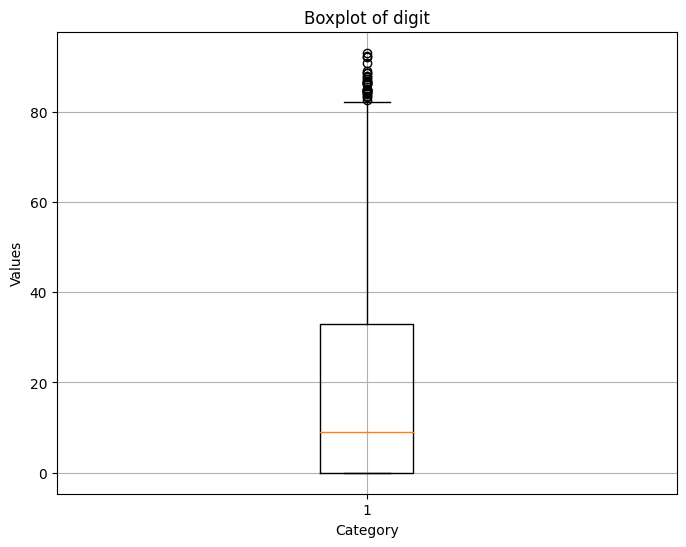

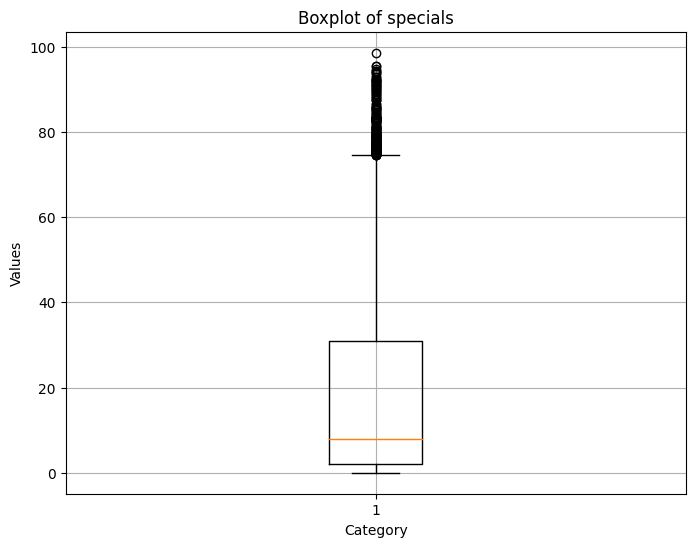

In [ ]:
import matplotlib.pyplot as plt
#This computes boxplots detailing the above distributions
for i in df_using:
  plt.figure(figsize=(8, 6))
  plt.boxplot(df_using_2[i])
  plt.title(f'Boxplot of {i}')
  plt.xlabel('Category')
  plt.ylabel('Values')
  plt.grid(True)
  plt.show()


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score


#This intializes the kmeans algorithm and employs the engineered features to bear association to the nearest centroid
kmeans = KMeans(n_clusters=5)
kmeans.fit(df_using_2)
labels = kmeans.labels_
centroids = kmeans.cluster_centers_
print("Cluster labels:", labels)
print("Cluster centroids:", centroids)
silhouette_avg = silhouette_score(df_using_2, labels)
print("Silhouette Score:", silhouette_avg)

/usr/local/lib/python3.10/dist-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


Cluster labels: [3 2 1 ... 3 1 1]
Cluster centroids: [[20.73584906 67.45065752]
 [ 2.81283422  3.4973262 ]
 [68.90816226 75.14965439]
 [19.29399142 18.15021459]
 [51.54514724 24.85648148]]
Silhouette Score: 0.5883226119885411


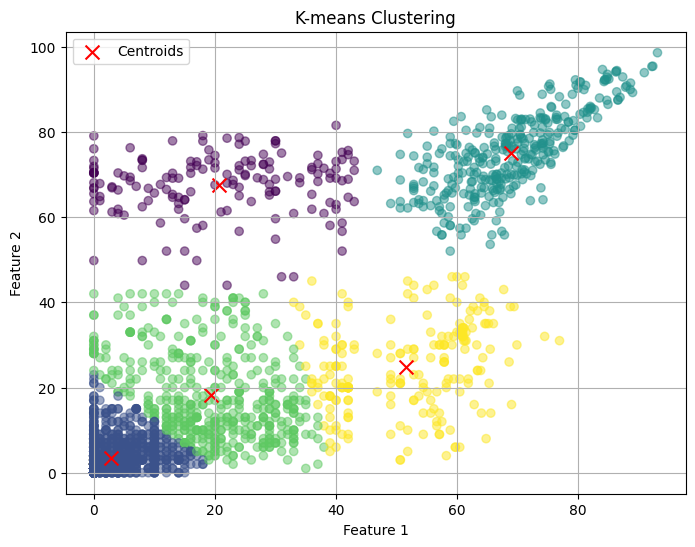

In [ ]:
import matplotlib.pyplot as plt
#This plots the kmeans clusters
plt.figure(figsize=(8, 6))
plt.scatter(df_using_2.iloc[:, 0], df_using_2.iloc[:, 1], c=labels, cmap='viridis', marker='o', alpha=0.5)
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=100, label='Centroids')
plt.title('K-means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.show()


Upon viewing this clustering, the impact of the log transformation is clearly noticeable and one can clearly see the formation of 4 or 5 distinct clusters. Certain Spam, probable spam heavy digit, probable spam heavy special character, not spam, and a potential suspicious grouping which looks to disperse from the definite not spam. As a result, I will employ 5 clusters with the goal of optimzing these labels based on the distribution about these features.

After making this adjustment, the pure distance to centroid association priciple for k means performs well however not ideal with the digit heavy points with some association to the cluster crossing the digit threshold set earlier. The silhoutte score details how simialr the points within a cluster are to said cluster as opoosed to others and this shows solid performance given the context as the variation among many datapoints inherently limits the ceiling of a silhoutte score. This performance overall is solid and may be employed however I will pivot to hierachial clustring below and assess this. I would also like to note that I am currently not pursuing DBSCAN as i anticipate it to struggle here in clustering these 5 gorupings due to the density variation within the groupings which I look to acquire. The not spam has subtantiially the stringest density, follwoed by the spam, suspicious, and the digit and sc heavy being rather sparse. As a result, if I were to set the eps low, these would not be clustered while the spam and not spam would however if I set it higher to allwo for siad clustering of the sparse groupings, it would result in the not spam cluster growing and potnetially encompassing a substantial amount of the suspicous points due to the distance between these clusters being similar to that of the digit and sc heavy cluster points themsleves. I will employ agglomerative hierarchial clustering below with a specific model type which bases the algorithm on preset clusters as I seek the 5 noted above. As a result, the dendogram cluster determineation from a non cluster speciifed technique is not implemented in that role here and rather is harnessed to allow for the gradual formation of clusters as datapoitns bear simialrity to one another until the specified 5 clusters is attained. My hope is this method will allow for the digit heavy cluster, yellow above, to avoid the inclusion of points below the threshold.

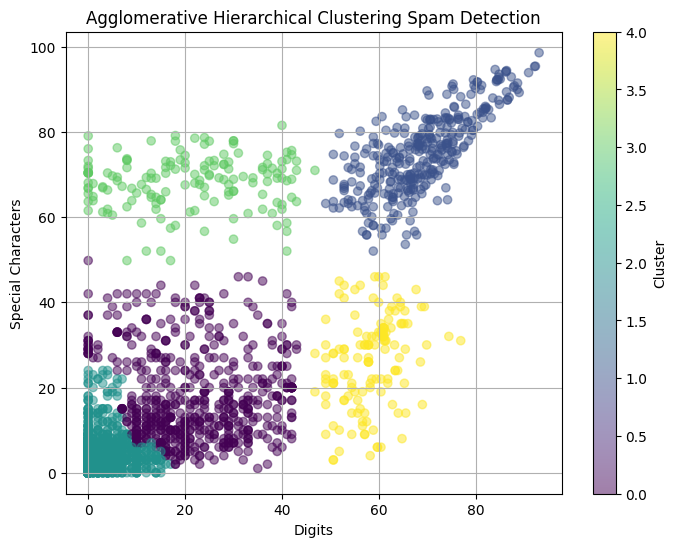

In [ ]:
from sklearn.cluster import AgglomerativeClustering

#This fits the agglomertaive clustering with my data and the specified 5 clusters to determien what points will adhere to each
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(df_using_2)
labels_agg = agg_clustering.labels_
plt.figure(figsize=(8, 6))
plt.scatter(df_using_2['digit'], df_using_2['specials'], c=labels_agg, cmap='viridis', marker='o', alpha=0.5)
plt.title('Agglomerative Hierarchical Clustering Spam Detection')
plt.xlabel('Digits')
plt.ylabel('Special Characters')
plt.colorbar(label='Cluster')
plt.grid(True)
plt.show()


This performed just as I hoped and looks to construct models with string distinction for the most part however there may be some overlap between suspcious and spam however the huerisitics of these labels which I will provide will idnicate this as such with susiciious showing a transition towards potentially being spam but not certain.

In [ ]:
#Cinvert the clusters to the semantic labels
labels = []
for i in labels_agg:
  if i == 3:
    labels.append("Probable Spam: special characters heavy")
  if i == 2:
    labels.append("Not Spam")
  if i == 1:
    labels.append("Spam")
  if i == 0:
    labels.append("Suspicious")
  if i == 4:
    labels.append("Probable Spam: digit heavy")

In [ ]:
labels

['Suspicious',
 'Serious Spam',
 'Not Spam',
 'Suspicious',
 'Suspicious',
 'Not Spam',
 'Suspicious',
 'Not Spam',
 'Serious Spam',
 'Not Spam',
 'Not Spam',
 'Not Spam',
 'Probable Spam: special characters heavy',
 'Not Spam',
 'Probable Spam: digit heavy',
 'Suspicious',
 'Not Spam',
 'Probable Spam: special characters heavy',
 'Suspicious',
 'Suspicious',
 'Not Spam',
 'Not Spam',
 'Suspicious',
 'Suspicious',
 'Not Spam',
 'Suspicious',
 'Not Spam',
 'Not Spam',
 'Not Spam',
 'Not Spam',
 'Probable Spam: digit heavy',
 'Probable Spam: digit heavy',
 'Not Spam',
 'Not Spam',
 'Suspicious',
 'Not Spam',
 'Not Spam',
 'Serious Spam',
 'Not Spam',
 'Suspicious',
 'Serious Spam',
 'Suspicious',
 'Serious Spam',
 'Not Spam',
 'Suspicious',
 'Not Spam',
 'Serious Spam',
 'Probable Spam: digit heavy',
 'Not Spam',
 'Probable Spam: special characters heavy',
 'Serious Spam',
 'Not Spam',
 'Not Spam',
 'Suspicious',
 'Not Spam',
 'Probable Spam: special characters heavy',
 'Suspicious',
 'S

In [ ]:
df_spam_2['label'] = labels

Now I will assess the viability of these clsuters as dsitinct categories by testing the classification models on the data, now unlabelled to simply get a quick look at if such algorithms can determine the class and essentially cluster they shoudl belong to. As stated above, this does not show that these models effectivley classify spam and rather just how distinguishing the clusters are.

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

#This is to train and test a knn
X = df_using_2
y = df_spam_2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
c = classification_report(y_test, y_pred_knn)
print(c)


                                         precision    recall  f1-score   support

                               Not Spam       1.00      1.00      1.00       280
             Probable Spam: digit heavy       1.00      1.00      1.00        29
Probable Spam: special characters heavy       1.00      1.00      1.00        34
                                   Spam       1.00      1.00      1.00        50
                             Suspicious       0.99      1.00      1.00       105

                               accuracy                           1.00       498
                              macro avg       1.00      1.00      1.00       498
                           weighted avg       1.00      1.00      1.00       498



In [ ]:
from sklearn.svm import SVC

#This is to train adn test SVM
X = df_using_2
y = df_spam_2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
svm = SVC(kernel='linear')
svm.fit(X_train, y_train)
y_pred_svm = svm.predict(X_test)
report = classification_report(y_test, y_pred_svm)
print(report)


                                         precision    recall  f1-score   support

                               Not Spam       0.56      0.53      0.55       280
             Probable Spam: digit heavy       0.12      0.10      0.11        29
Probable Spam: special characters heavy       0.09      0.09      0.09        34
                                   Spam       0.07      0.08      0.07        50
                             Suspicious       0.21      0.23      0.22       105

                               accuracy                           0.37       498
                              macro avg       0.21      0.21      0.21       498
                           weighted avg       0.38      0.37      0.37       498



In [ ]:
from sklearn.ensemble import RandomForestClassifier

#This is to train and test a random forest
X = df_using_2
y = df_spam_2['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=50)
rf_classifier = RandomForestClassifier(n_estimators=100, random_state=42)
rf_classifier.fit(X_train, y_train)
y_pred_rf = rf_classifier.predict(X_test)
report = classification_report(y_test, y_pred_rf)
print(report)


                                         precision    recall  f1-score   support

                               Not Spam       1.00      1.00      1.00       280
             Probable Spam: digit heavy       1.00      1.00      1.00        29
Probable Spam: special characters heavy       1.00      1.00      1.00        34
                                   Spam       1.00      1.00      1.00        50
                             Suspicious       0.99      0.99      0.99       105

                               accuracy                           1.00       498
                              macro avg       1.00      1.00      1.00       498
                           weighted avg       1.00      1.00      1.00       498



In [ ]:

# This gathers the feature imporatnce for impact in information gain for digit and special characters
feature_importance = rf_classifier.feature_importances_
df_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': feature_importance})
df_feature_importance = df_feature_importance.sort_values(by='Importance', ascending=False)
print(df_feature_importance)


    Feature  Importance
0     digit    0.516731
1  specials    0.483269


In [ ]:
df_results = df_spam_2.iloc[:, -3:]

# Evaluation

Following the comphrensive process above, a successfull clustering was conducted in which distinct catgeories could be established, corrorborated by the model perofrmance. As there are no labels for spam, the viability of these models to classify for datapoints which have certain labels cannot be tested however this would be a fasicnating route of future exploration to apply these models and potentially improve them. In adiditon, digit has a slight higher importance for entropy loss than special characters however this is a negligible amount and thery are roughly the same. Each of the three models, kNN, SVM, and RF performed close to perfect, indicating the ability of these clusters to distinguish the data with kNN the best followed by RF and SVM however these differences are minimal. I will display the amount emails of each spam label, feature importance form the RF, the employed clustering results and the confusion matricies for each of the classifcation models below.

In [ ]:
# Your code starts here
#   Please add comments or text cells in between to explain the general idea of each block of the code.
#   Please feel free to add more cells below this cell if necessary






**Spam Label Counts**

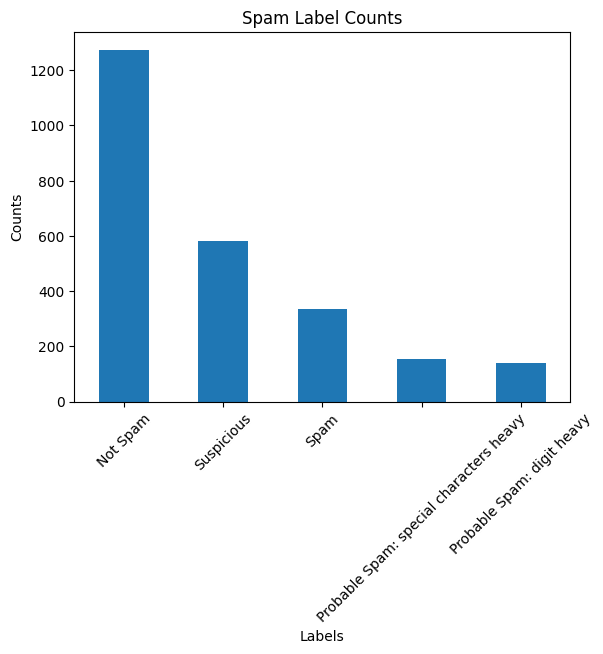

In [ ]:
counts = df_results['label'].value_counts()
counts.plot(kind='bar')
plt.title('Spam Label Counts')
plt.xlabel('Labels')
plt.xticks(rotation=45)
plt.ylabel('Counts')
plt.show()

**RF Feature Importance**

In [ ]:
df_feature_importance

,Feature,Importance
0,digit,0.516731
1,specials,0.483269


**Agglomerative Hierarchial Clustering Results**

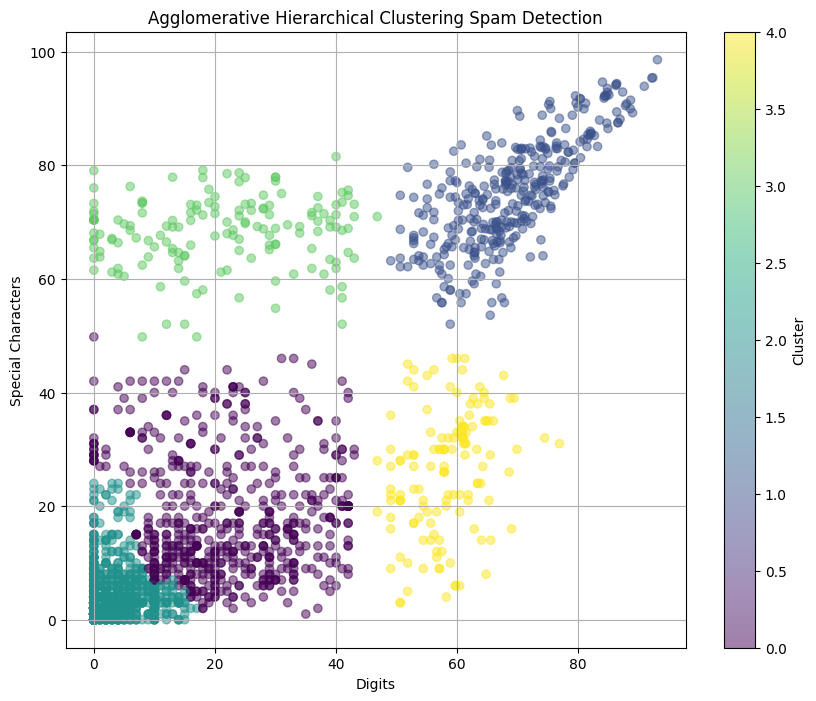

In [ ]:

agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_clustering.fit(df_using_2)
labels_agg = agg_clustering.labels_
plt.figure(figsize=(10, 8))
plt.scatter(df_using_2['digit'], df_using_2['specials'], c=labels_agg, cmap='viridis', marker='o', alpha=0.5)
plt.title('Agglomerative Hierarchical Clustering Spam Detection')
plt.xlabel('Digits')
plt.ylabel('Special Characters')
plt.colorbar(label='Cluster')
plt.grid(True)
cluster_plot = plt.show()
cluster_plot

**kNN Confusion Matrix**

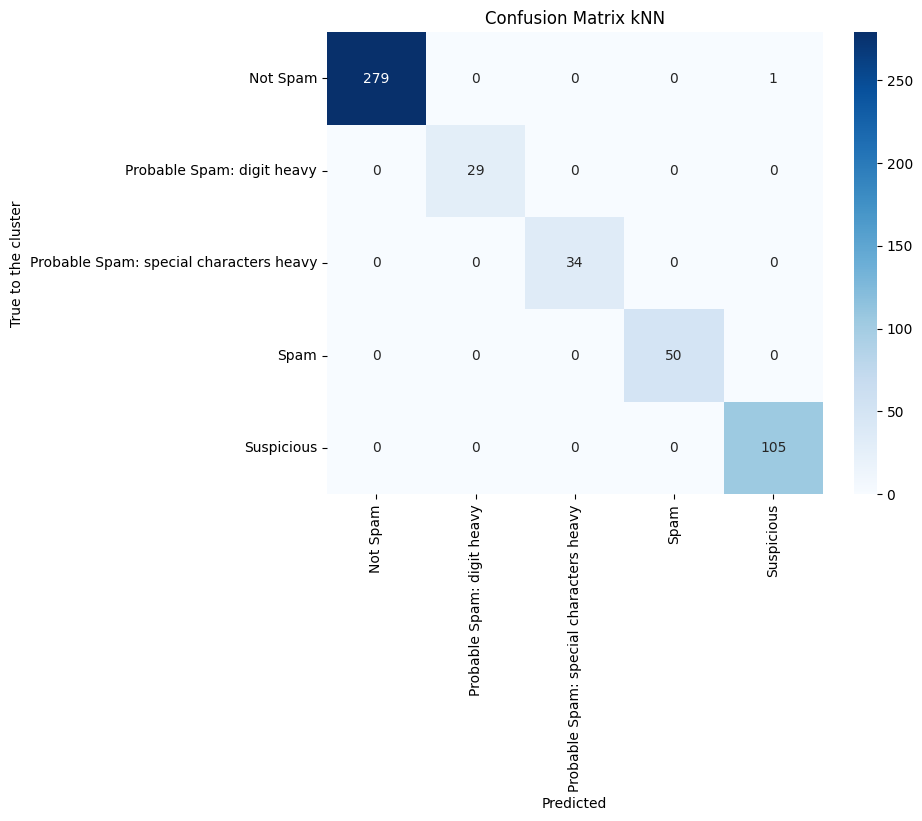

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
cm_knn = confusion_matrix(y_test, y_pred_knn)
plt.figure(figsize=(8, 6))
unique_labels = np.unique(y_test)
sns.heatmap(cm_knn, annot=True, cmap='Blues', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True to the cluster')
plt.title('Confusion Matrix kNN')
plt.show()


**SVM Confusion Matrix**

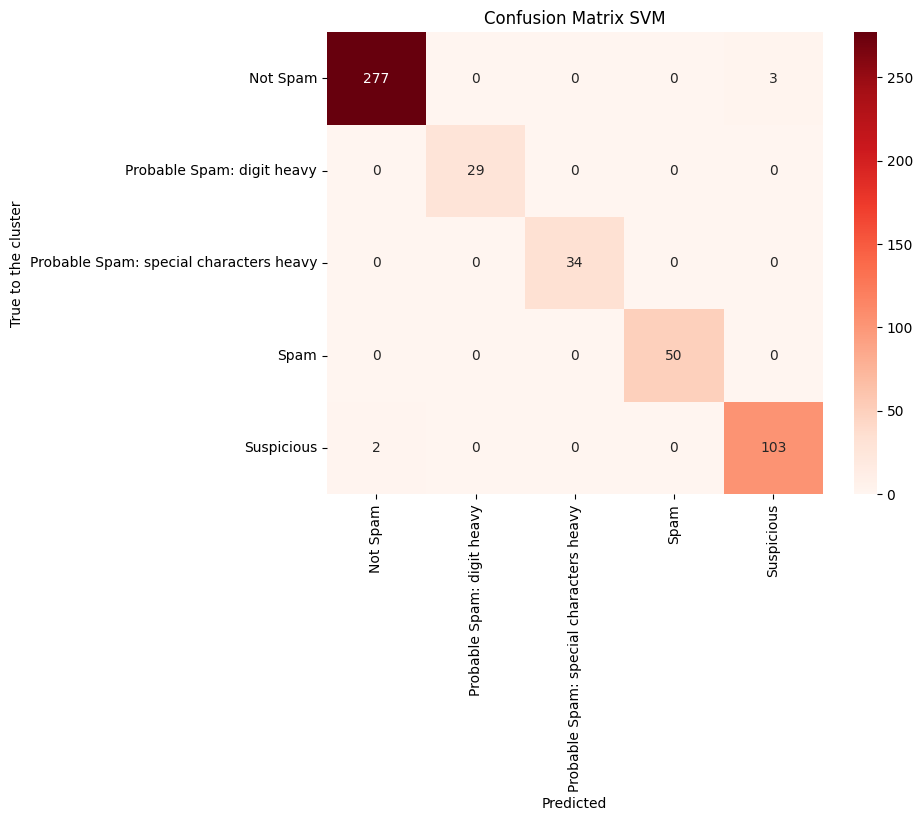

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
cm_svm = confusion_matrix(y_test, y_pred_svm)
plt.figure(figsize=(8, 6))
unique_labels = np.unique(y_test)
sns.heatmap(cm_svm, annot=True, cmap='Reds', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True to the cluster')
plt.title('Confusion Matrix SVM')
plt.show()


**RF Confusion Matrix**

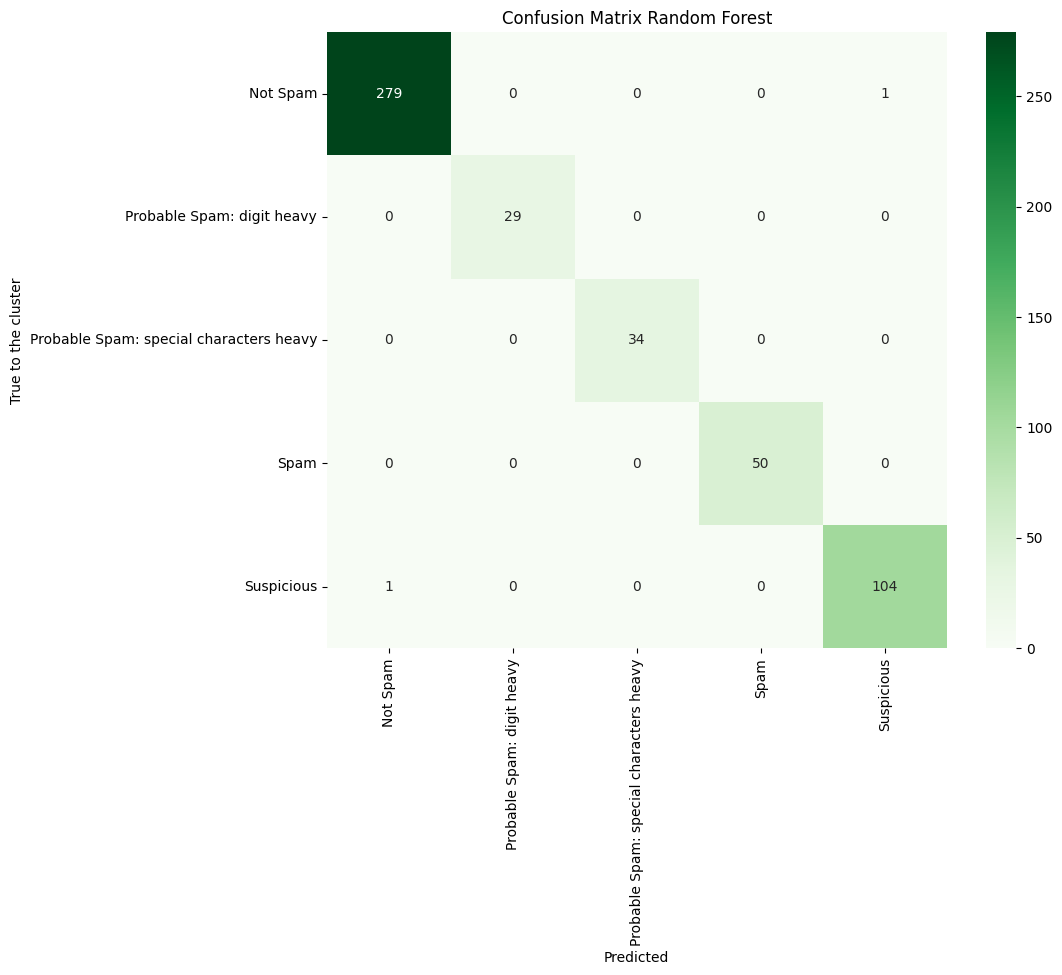

In [ ]:
import seaborn as sns
from sklearn.metrics import confusion_matrix
import numpy as np
cm_rf = confusion_matrix(y_test, y_pred_rf)
plt.figure(figsize=(10, 8))
unique_labels = np.unique(y_test)
sns.heatmap(cm_rf, annot=True, cmap='Greens', fmt='g', xticklabels=unique_labels, yticklabels=unique_labels)
plt.xlabel('Predicted')
plt.ylabel('True to the cluster')
plt.title('Confusion Matrix Random Forest')
plt.show()
